# Load Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import missingno as msno

sns.set(style = 'white')

In [2]:
train = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
for i in train.columns:
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

            customerID
0825-CPPQH           1
5954-BDFSG           1
5685-IIXLY           1
9602-WCXPI           1
5293-WXJAK           1
...                ...
4334-HOWRP           1
7203-OYKCT           1
2592-SEIFQ           1
0390-DCFDQ           1
6115-ZTBFQ           1

[7043 rows x 1 columns]
        gender
Male      3555
Female    3488
     Partner
No      3641
Yes     3402
     Dependents
No         4933
Yes        2110
     PhoneService
Yes          6361
No            682
                  MultipleLines
No                         3390
Yes                        2971
No phone service            682
             InternetService
Fiber optic             3096
DSL                     2421
No                      1526
                     OnlineSecurity
No                             3498
Yes                            2019
No internet service            1526
                     OnlineBackup
No                           3088
Yes                          2429
No internet service    

In [5]:
train.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
train.dtypes # Checking the data types of all the columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Detecting Missing Values

In [7]:
train.TotalCharges = pd.to_numeric(train.TotalCharges, errors='coerce')
train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
print("Categorical Var. : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')
Numeric Var. : Index(['MonthlyCharges', 'TotalCharges'], dtype='object')


In [9]:
train_missings=train.filter(['TotalCharges'], axis=1)

In [10]:
def values_table(train_missings):
        mis_val = train_missings.isnull().sum()
        mis_val_percent = 100 * train_missings.isnull().sum() / len(train_missings)
        mean=train_missings.mean()
        median=train_missings.median()
        total=train_missings.count()
        zeros=train_missings[train_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Train Missing Values', 1 : '% of Train Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = train_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Train Total Values', ascending=False).round(1)
        print ("There are " + str(train.shape[1]) + " columns and " + str(train.shape[0]) + " rows in the dataset.\n"      
             + str(table.shape[0]) + " of these columns have missing variables.")
        return table

values_table(train_missings)

There are 21 columns and 7043 rows in the dataset.
1 of these columns have missing variables.


,Train Missing Values,% of Train Total Values,Mean,Median,# of Values,# of Zeros,Data Type
TotalCharges,11,0.2,2283.3,1397.5,7032,0,float64


# Get Rid Of Missing Values & One Hot Encoding & EDA

* Let's remove these 11 rows from our dataset

In [11]:
#Removing missing values 
train.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = train.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


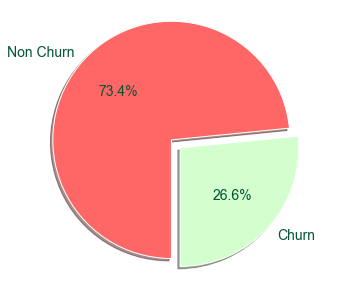

In [12]:
churn=train[train['Churn']=='Yes'].shape[0]
non_churn= train[train['Churn']=='No'].shape[0]

slices=[churn,non_churn]
labels=['Churn','Non Churn']
explode=[0.1,0]

colors = ['#d3ffce', '#ff6666']
#794044  #065535

fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(slices, explode=explode,colors= colors, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270,textprops={'fontsize': 14,'color':"#065535"})
ax1.axis('equal')  
plt.show()

In [13]:
corr_matrix=train.corr().abs()
sorted_corr=(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sorted_corr.head()

<ipython-input-13-877d7d7b6e0b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sorted_corr=(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


tenure          TotalCharges      0.825880
MonthlyCharges  TotalCharges      0.651065
tenure          MonthlyCharges    0.246862
SeniorCitizen   MonthlyCharges    0.219874
                TotalCharges      0.102411
dtype: float64

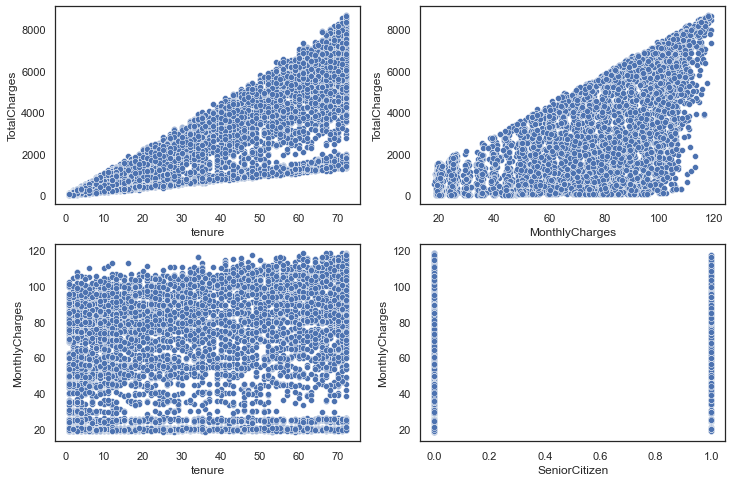

In [14]:
x_vars=['tenure', 'MonthlyCharges', 'tenure', 'SeniorCitizen']
y_vars=['TotalCharges', 'TotalCharges', 'MonthlyCharges', 'MonthlyCharges']

fig, axarr=plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axarr=axarr.flatten()
for i in range(len(x_vars)):
    sns.scatterplot(data=train, x=x_vars[i], y=y_vars[i], ax=axarr[i])

<AxesSubplot:>

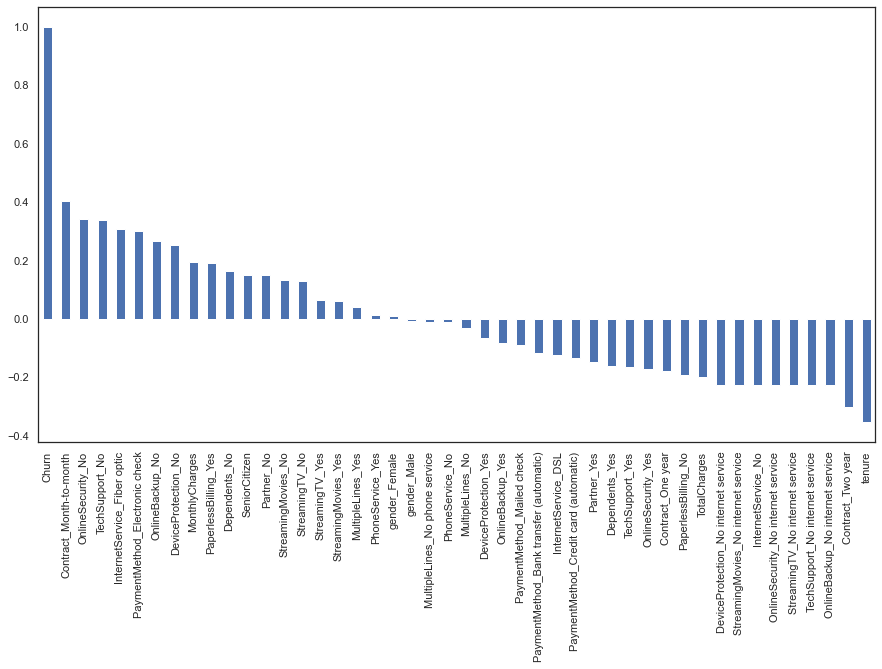

In [15]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

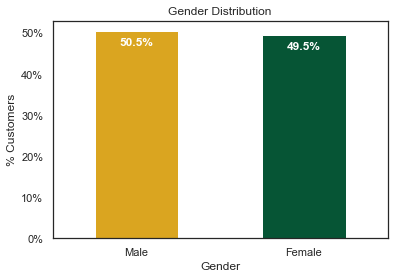

In [16]:
colors = ['#daa520','#065535']
ax = (train['gender'].value_counts()*100.0 /len(train)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

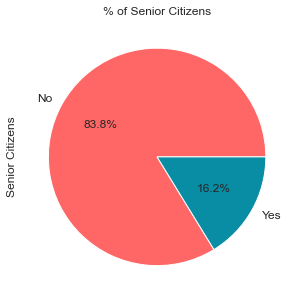

In [17]:
colors = ['#ff6666', '#088da5']
#794044  #065535
ax = (train['SeniorCitizen'].value_counts()*100.0 /len(train))\
.plot.pie(autopct='%.1f%%', colors= colors,labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '% of Senior Citizens')

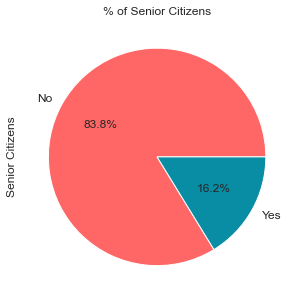

In [18]:
colors = ['#ff6666', '#088da5']
#794044  #065535
ax = (train['SeniorCitizen'].value_counts()*100.0 /len(train))\
.plot.pie(autopct='%.1f%%', colors= colors,labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

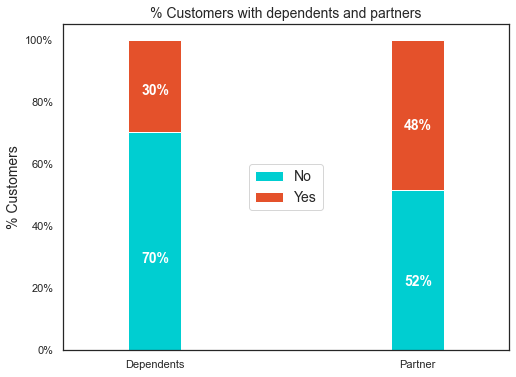

In [19]:
df2 = pd.melt(train, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(train)
colors = ['#00ced1','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

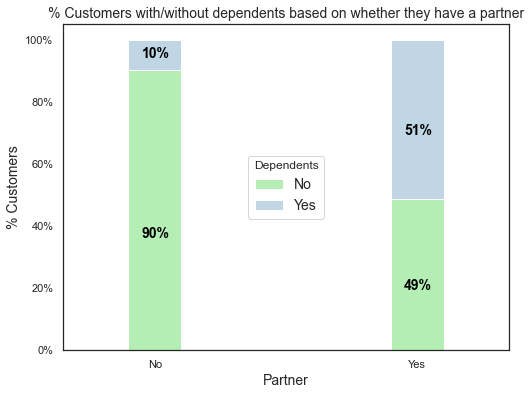

In [20]:
colors = ['#b4eeb4','#c0d6e4']
partner_dependents = train.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold',
               size = 14)

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

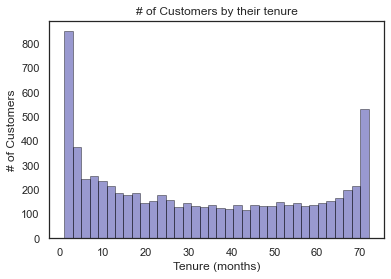

In [21]:
ax = sns.distplot(train['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

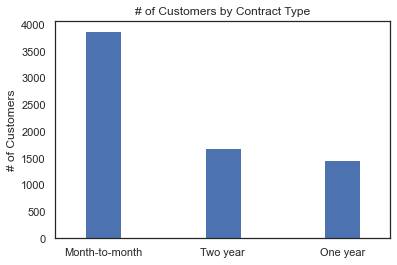

In [22]:
ax = train['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

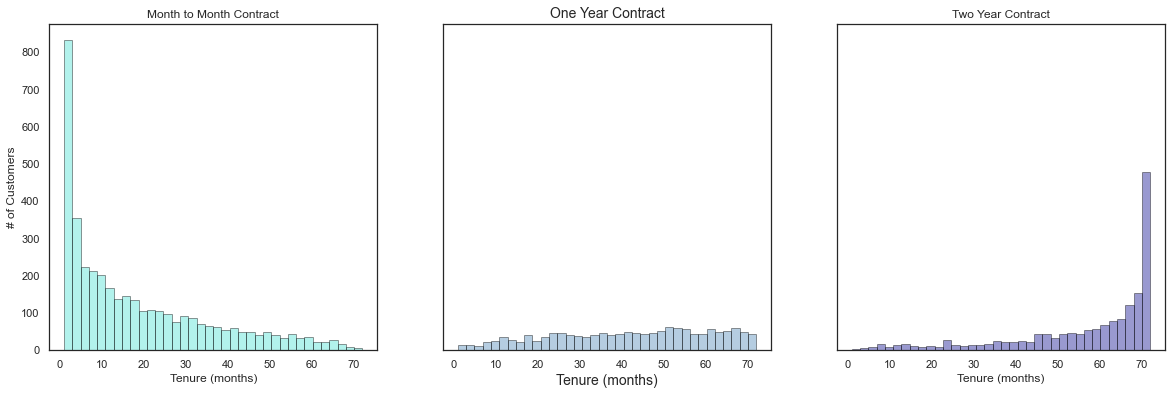

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(train[train['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(train[train['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(train[train['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

In [24]:
train.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

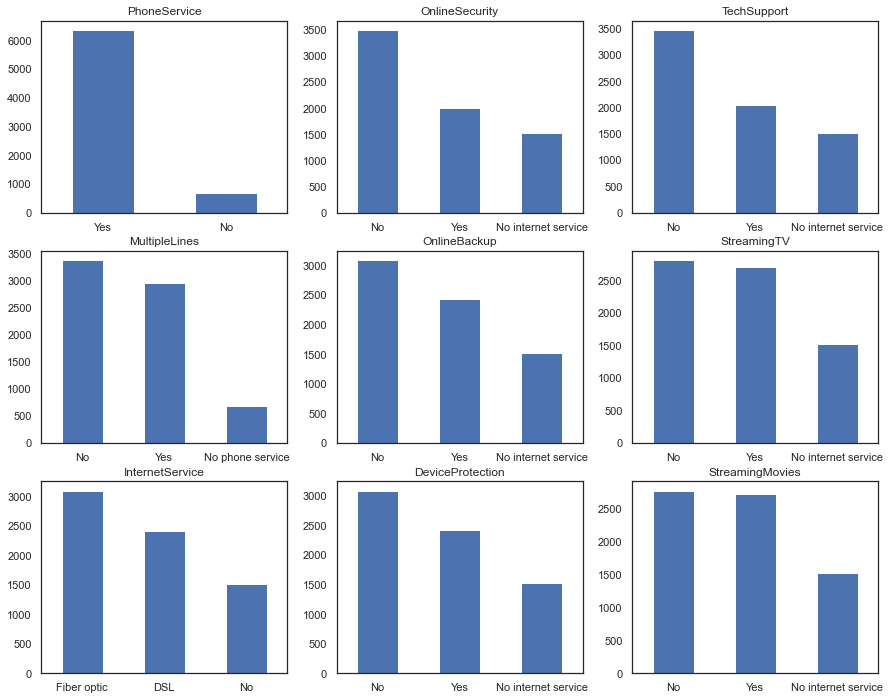

In [25]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = train[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = train[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = train[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

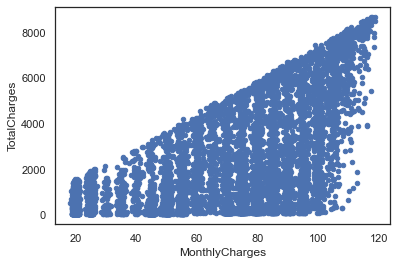

In [26]:
train[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

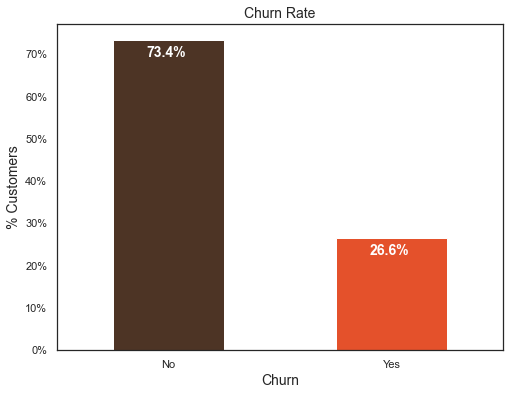

In [27]:
colors = ['#4D3425','#E4512B']
ax = (train['Churn'].value_counts()*100.0 /len(train)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

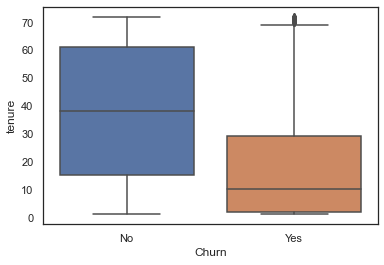

In [28]:
sns.boxplot(x = train.Churn, y = train.tenure)

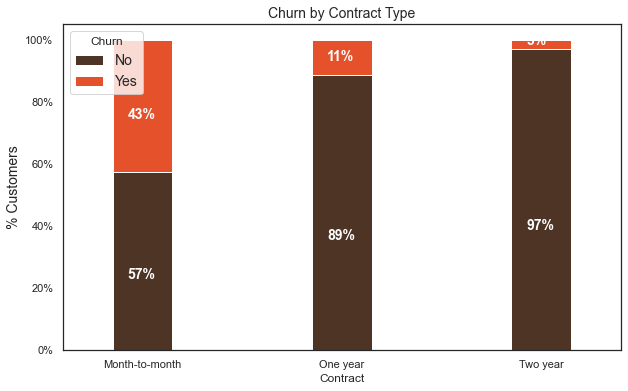

In [29]:
colors = ['#4D3425','#E4512B']
contract_churn = train.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

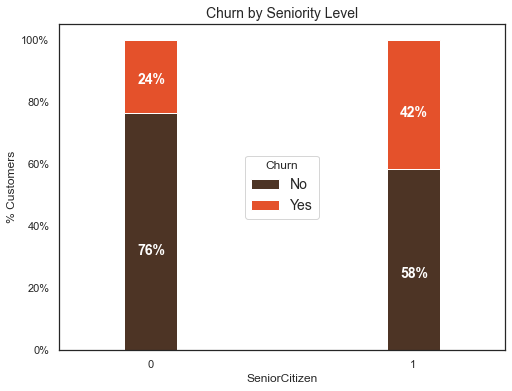

In [30]:
colors = ['#4D3425','#E4512B']
seniority_churn = train.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

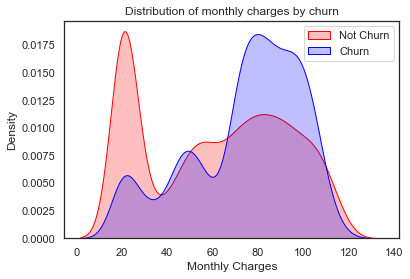

In [31]:
ax = sns.kdeplot(train.MonthlyCharges[(train["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(train.MonthlyCharges[(train["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

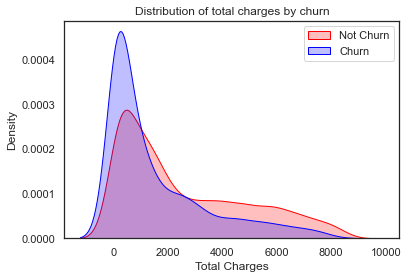

In [32]:
ax = sns.kdeplot(train.TotalCharges[(train["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(train.TotalCharges[(train["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Correlation Matrix

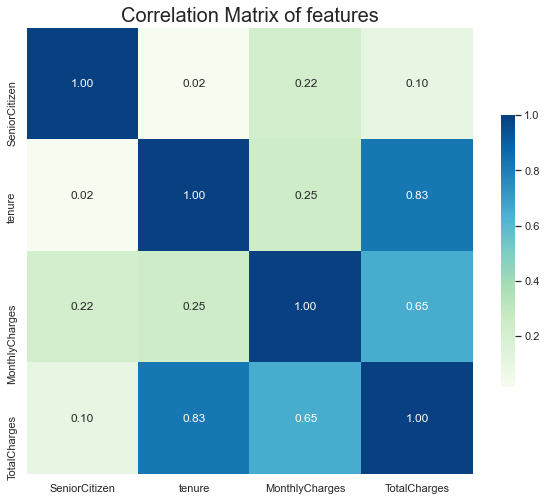

In [33]:
correlation_matrix = train.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=20)
plt.show()

In [34]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\

<AxesSubplot:xlabel='Churn', ylabel='count'>

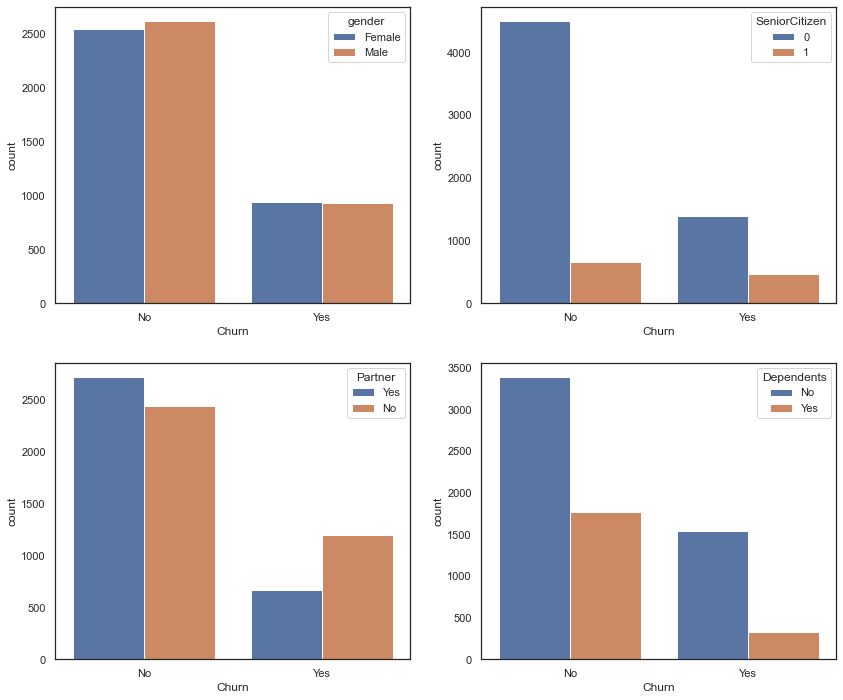

In [35]:
plt.figure(figsize=(14,12))
#gender influence
plt.subplot(2,2,1)
sns.countplot(train["Churn"],hue = train["gender"])

#Senior citizen influence on target variable
plt.subplot(2,2,2)
sns.countplot(train["Churn"],hue = train["SeniorCitizen"])

#Partner influence on target variable
plt.subplot(2,2,3)
sns.countplot(train["Churn"],hue = train["Partner"])

#dependents influence on target value
plt.subplot(2,2,4)
sns.countplot(train["Churn"],hue = train["Dependents"])

array([[<AxesSubplot:xlabel='SeniorCitizen', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='tenure', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='SeniorCitizen'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>,
        <AxesSubplot:xlabel='tenure', ylabel='tenure'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>,
 

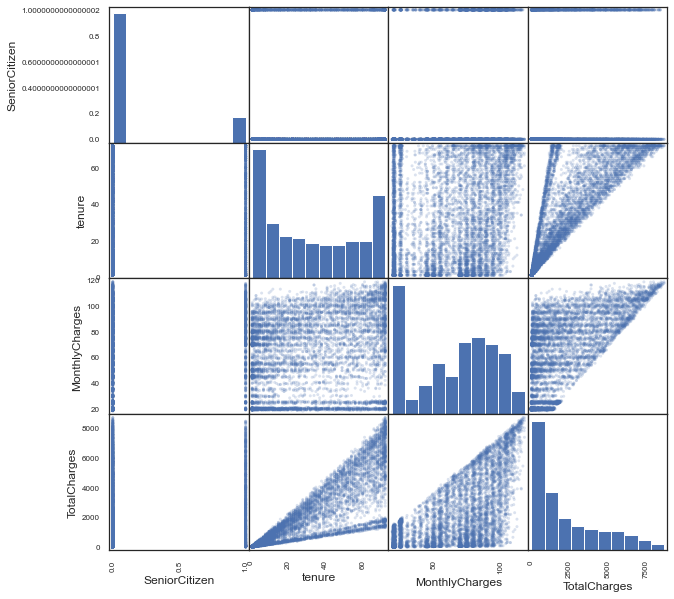

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(train,alpha=0.2, figsize=(10, 10))

D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


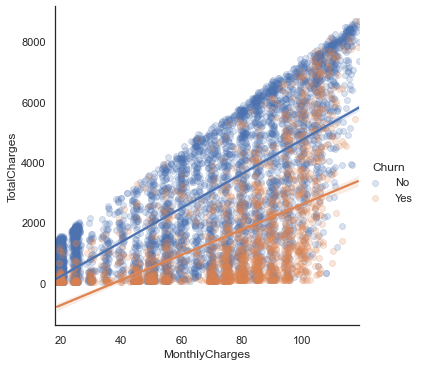

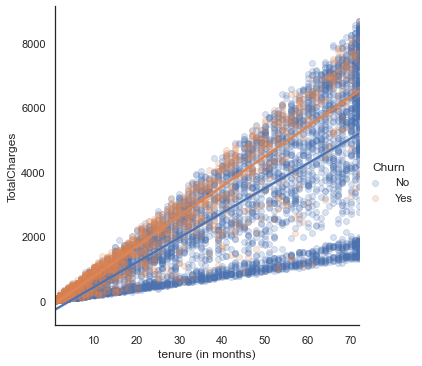

In [37]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lmplot('MonthlyCharges', 'TotalCharges', data=train, hue='Churn',
           scatter_kws={'alpha': 0.2})
fig = sns.lmplot('tenure', 'TotalCharges', data=train, hue='Churn',
                 scatter_kws={'alpha': 0.2})
fig.set_xlabels('tenure (in months)');

# SUPPORT VECTOR MACHINE (SVM)

In [38]:
# We separate the target column
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

## Min-Max Scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [40]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


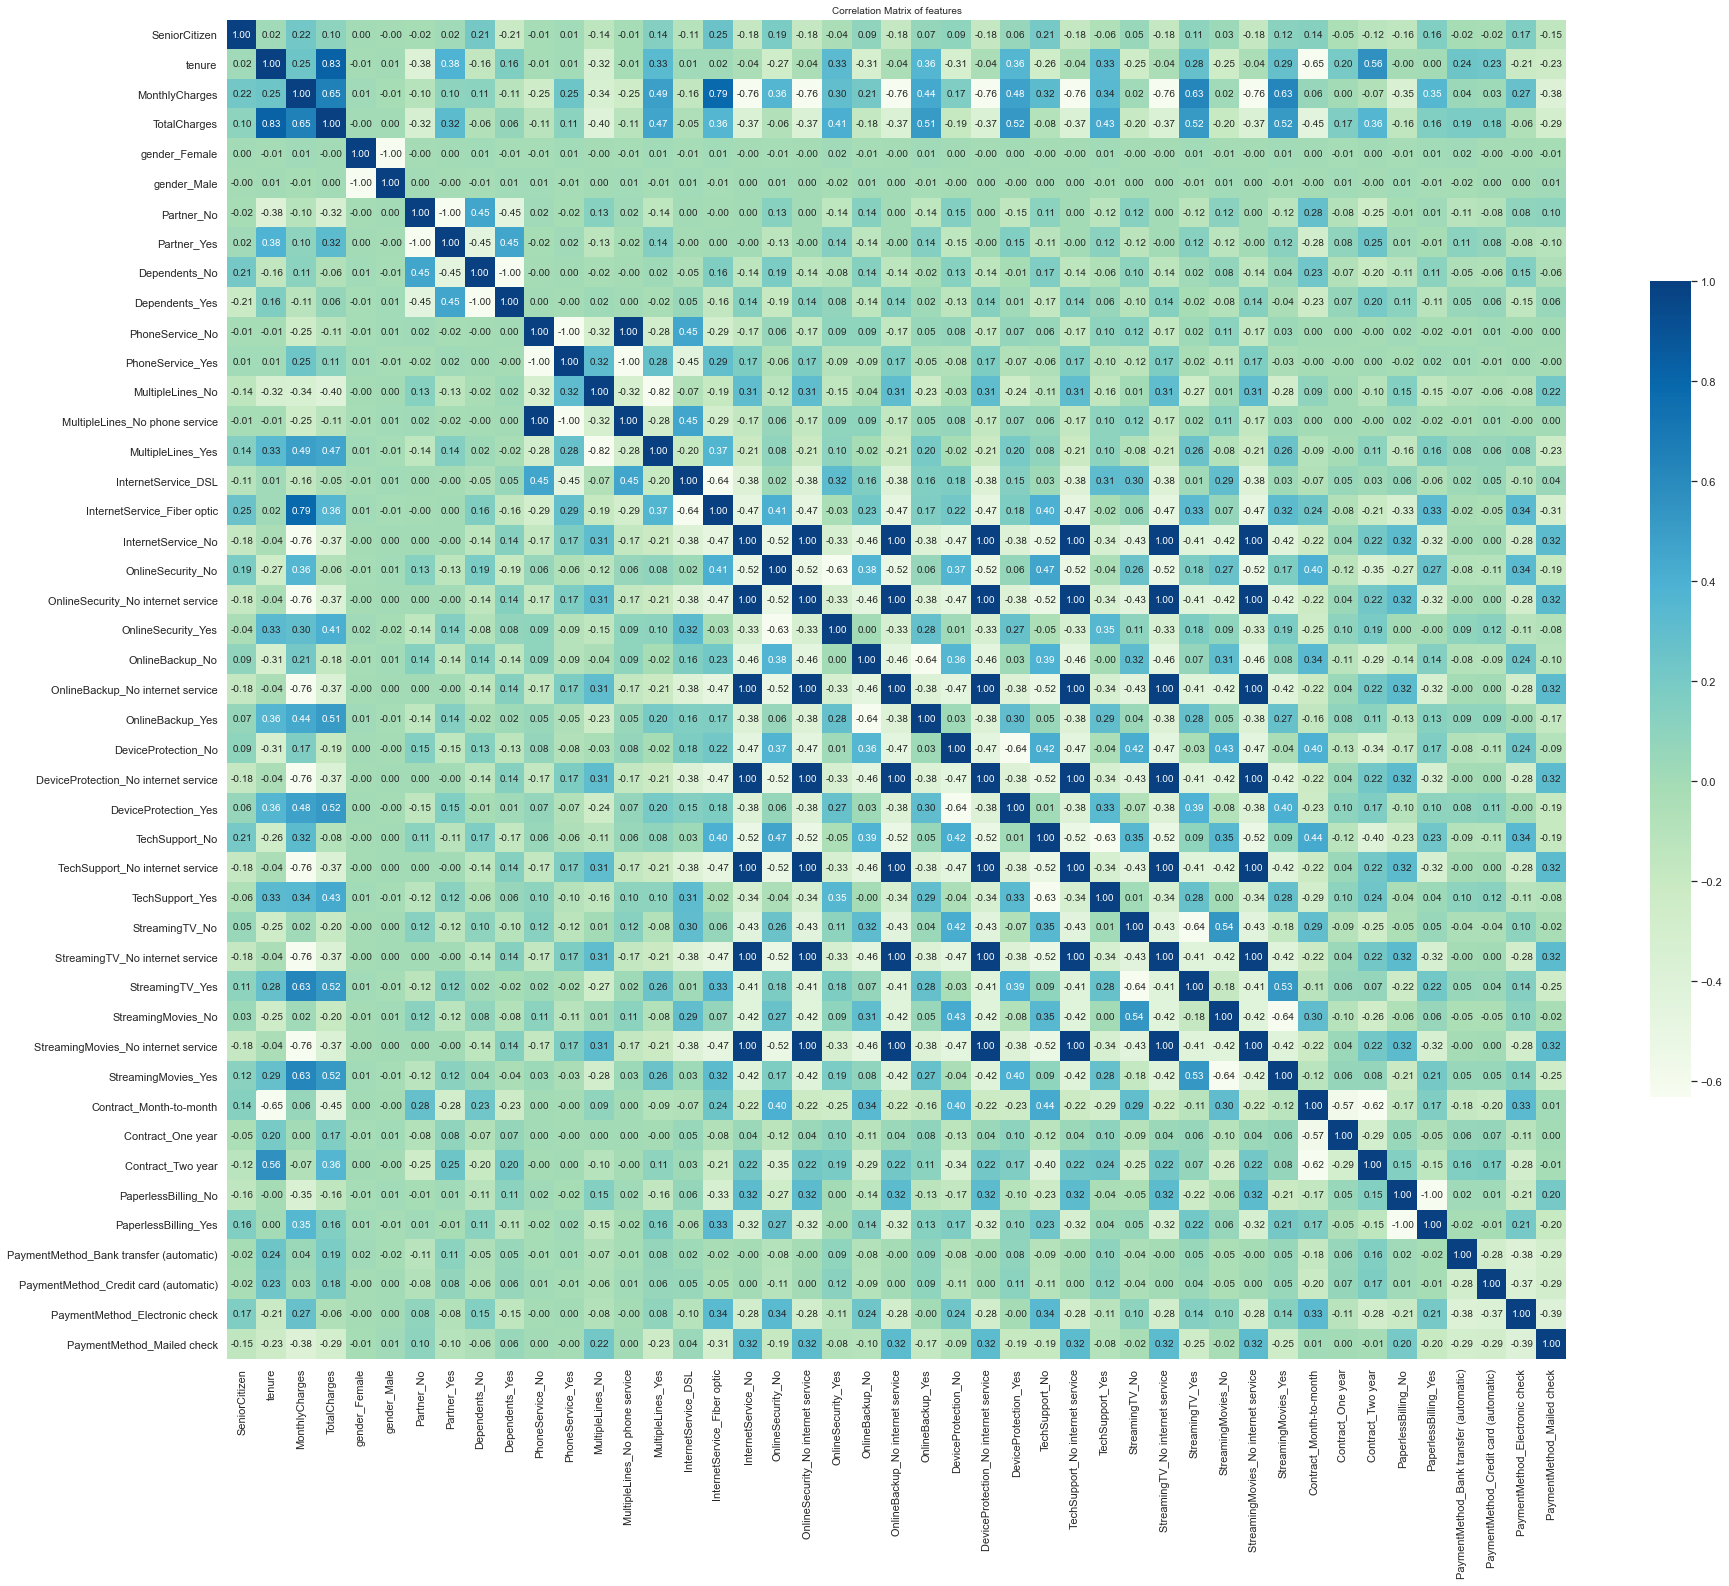

In [41]:
correlation_matrix = X.corr()
plt.figure(figsize=(30, 30))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=10)
plt.show()

# Train-Validation-Test Data Splitting

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.15,
                                                  shuffle = True,
                                                 random_state=42)

In [43]:
all = {"X train" : X_train,
       "X validation" : X_val,
       "X test" : X_test,
       "y train" : y_train,
       "y validation": y_val,
       "y test": y_test}

for i in all:
    print(f"{i} number of lines : {len(all.get(i))}")

X train number of lines : 4781
X validation number of lines : 844
X test number of lines : 1407
y train number of lines : 4781
y validation number of lines : 844
y test number of lines : 1407


In [44]:
svm = SVC(kernel='linear',random_state=42).fit(X_train,y_train)
y_pred = svm.predict(X_val)
accuracy_score(y_val, y_pred)

0.7855450236966824

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
cv_results = cross_val_score(svm, X_train, y_train, cv = 5, scoring= "accuracy")

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report


Accuracy score : 0.7855450236966824




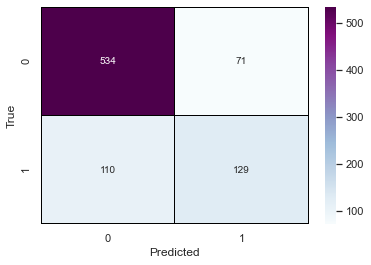



              precision    recall  f1-score   support

           0       0.83      0.88      0.86       605
           1       0.65      0.54      0.59       239

    accuracy                           0.79       844
   macro avg       0.74      0.71      0.72       844
weighted avg       0.78      0.79      0.78       844



In [47]:
#print(cv_results)
#print(cv_results.mean())
print(f"\nAccuracy score : {accuracy_score(y_val, y_pred)}")
print("\n")
cm = confusion_matrix(y_val,y_pred)
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("\n")
print(classification_report(y_val, y_pred))

In [48]:
dict_values=dict(pd.Series(y).value_counts())
print("Class-0 :",dict_values[0])
print("Class-1 :",dict_values[1])

Class-0 : 5163
Class-1 : 1869


### -There is an uneven distribution in our target variable.
### -We need to balance.

In [49]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=12345)
X_res, y_res = smt.fit_resample(X, y)


print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 5163, 1: 5163})


# smote işlemi 



Accuracy_score(train): 0.7669847600056972
Accuracy_score(val): 0.7667473769168685




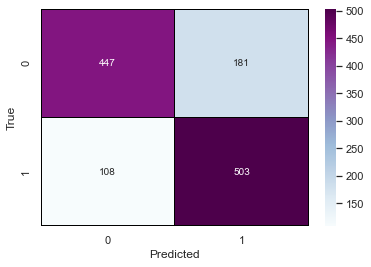



              precision    recall  f1-score   support

           0       0.81      0.71      0.76       628
           1       0.74      0.82      0.78       611

    accuracy                           0.77      1239
   macro avg       0.77      0.77      0.77      1239
weighted avg       0.77      0.77      0.77      1239



In [50]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X_res, 
                                                    y_res,
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.15,
                                                  shuffle = True,
                                                 random_state=1)


# Modelling
svm=SVC(kernel='linear',random_state=12345).fit(X_train,y_train)
y_pred = svm.predict(X_val)


y_train_pred = svm.predict(X_train)
print("\n")
print("Accuracy_score(train):",accuracy_score(y_train, y_train_pred))
print("Accuracy_score(val):",accuracy_score(y_val, y_pred))
print("\n")
cm = confusion_matrix(y_val,y_pred)
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("\n")
print(classification_report(y_val, y_pred))

In [51]:
all = {"X train" : X_train,
       "X validation" : X_val,
       "X test" : X_test,
       "y train" : y_train,
       "y validation": y_val,
       "y test": y_test}

for i in all:
    print(f"{i} number of lines: {len(all.get(i))}")

X train number of lines: 7021
X validation number of lines: 1239
X test number of lines: 2066
y train number of lines: 7021
y validation number of lines: 1239
y test number of lines: 2066


In [52]:
len(X_train),len(X_val),len(X_test),len(y_train),len(X_test)

(7021, 1239, 2066, 7021, 2066)

In [53]:
len(y_pred)

1239

In [54]:
print(svm.coef_)

[[ 0.14520212 -3.10471053 -0.23020301  2.04891035  0.0270825  -0.0270825
  -0.03493404  0.03493404  0.03982463 -0.03982463  0.03014773 -0.03014773
  -0.10419585  0.03014773  0.07404812 -0.08680971  0.2020404  -0.11523069
   0.21524811 -0.11523069 -0.10001741  0.09295832 -0.11523069  0.02227238
   0.066244   -0.11523069  0.04898669  0.2293361  -0.11523069 -0.11410541
  -0.03178357 -0.11523069  0.14701427 -0.02578513 -0.11523069  0.14101582
   0.63351489 -0.26588765 -0.36762723 -0.14368681  0.14368681 -0.05179339
  -0.11696814  0.16306244  0.00569909]]


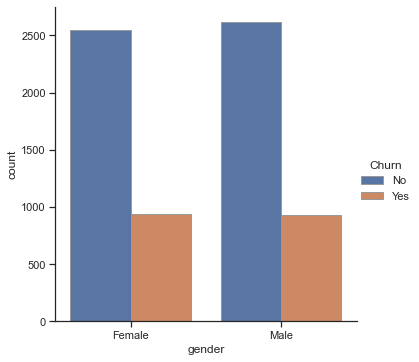

In [55]:
sns.set_theme(style="ticks")
ax1 = sns.catplot(x="gender", kind="count", hue="Churn",edgecolor=".6", data=train,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# ROC Curve & AUC

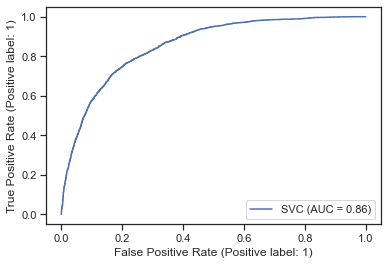

In [56]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm, X_res, y_res)

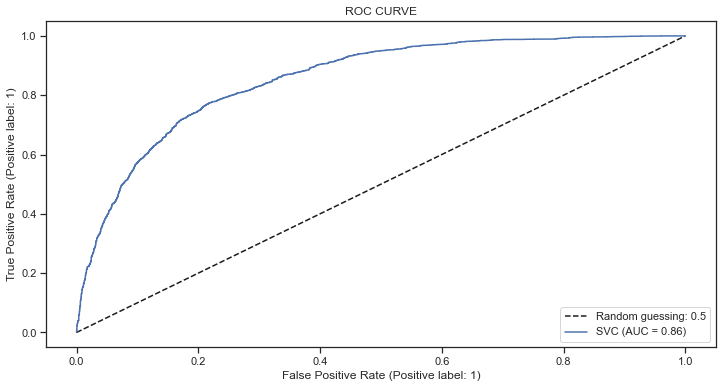

In [57]:
models = [svm]

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.title("ROC CURVE")
plt.legend(loc="lower right")
ax = plt.gca()

for i in models:
  plot_roc_curve(i, X_train, y_train,ax=ax)

# Precision-Recall Curve

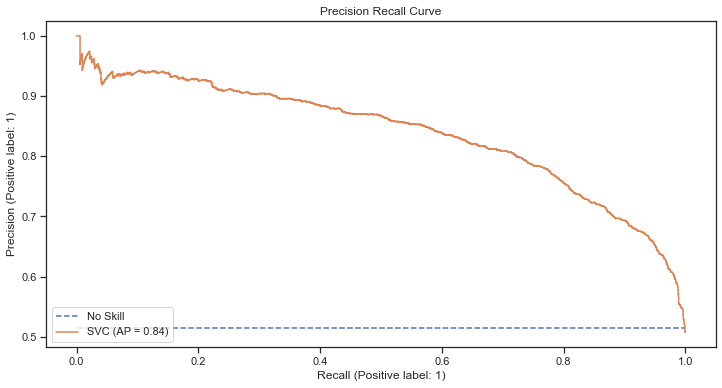

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib
import matplotlib.pyplot as plt
models = [svm]

plt.figure(figsize = (12,6), linewidth= 1)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.title("Precision Recall Curve")
plt.legend(loc="upper left")
ax = plt.gca()

for i in models:
  plot_precision_recall_curve(i, X_train, y_train,ax=ax)

In [59]:
y_test_pred = svm.predict(X_test)

In [60]:
len(y_test_pred),len(y_test)

(2066, 2066)

In [61]:
def countX(data, x): 
    count = 0
    for n in data: 
        if (n == x): 
            count = count + 1
    return count 
  
x = 1
print("\n")
print('The value of {} in the predicted data : {}'.format(x, countX(y_test_pred, x))) 
print('Value of {} in real data : {}'.format(x, countX(y_test, x))) 
print("\n")



The value of 1 in the predicted data : 1111
Value of 1 in real data : 1062




# Test Data 



Accuracy score :  0.7720232333010648




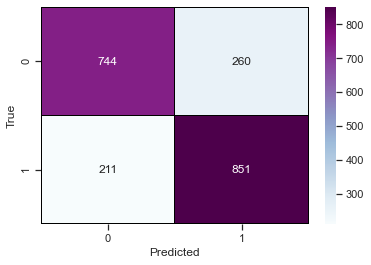



              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1004
           1       0.77      0.80      0.78      1062

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



In [62]:
print("\n")
print("Accuracy score : ",accuracy_score(y_test, y_test_pred))
print("\n")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("\n")
print(classification_report(y_test, y_test_pred))